<div class="alert alert-block alert-info">
Singapore Management University<br>
CS105 Statistical Thinking for Data Science, 2024/25 Term 2
</div>

# CS105 Group Project Submission (Part I)

-----
Provide your team details, including section, team number, team members, and the name of the dataset. 
Complete all of the following sections. For any part requiring code to derive your answers, please create a code cell immediately below your response and run the code.
To edit any markdown cell, double click the cell; after editing, execute the markdown cell to collapse it.
<br>
-----

## Declaration

<span style="color:red">By submitting this notebook, we declare that **no part of this submission is generated by any AI tool**. We understand that AI-generated submissions will be considered as plagiarism, and just like other plagirisum cases, disciplinary actions will be imposed.</span>

#### Section: G2
#### Team: T3
#### Members:
1. Bradley Goh
2. Denzyl Ng
3. Jared Yeo
4. Nagaraj Yohapriya
5. Zhang Zemin

#### Dataset: Credit

## Part I: Exploratory Data Analysis (EDA) [8% of final grade]

### 1. Overview of dataset [15% of Part I]

**a.** Summarise the background of the dataset [limited to 50 words]

**Response.** 
The dataset contains data of individuals applying for a credit facility in a bank. Each row corresponds to a different applicant and contains attributes captured by bank during an application. The approval status of each application is also captured in each row.

**b.** State the size of the dataset

**Response.**
1000 rows x 23 columns

**c.** For each variable, describe what it represents and its data type (numerical or categorical)

In [22]:
#**Response.**

import pandas as pd

# Create a dictionary with the data
data = {
    'Name': [
        'ID', 'Checking_Account', 'Duration', 'Payment_Status', 'Purpose', 
        'Amount', 'Savings_Account', 'Employment', 'Installment', 'Personal_Status', 
        'Guarantors', 'Residence_Length', 'Assets', 'Age', 'Credit_Rating', 
        'Existing_Credits', 'Housing_Type', 'Num_Credits', 'Occupation', 'Dependents', 
        'Telephone', 'Foreign_Worker', 'Approval'
    ],
    'Description': [
        'Identification number', 'Status of checking account', 'Credit duration in months', 'Credit history', 'Purpose of credit',
        'Credit amount', 'Status of savings account', 'Length of current employment', 'Installment rate as percentage of disposable income', 
        'Marital status and sex', 'Other debtors or guarantors', 'Number of years staying in current residence', 'Asset ownership', 
        'Age in years', 'Credit rating', 'Other existing credit in place', 'Type of apartment', 'Number of existing credits', 
        'Occupation', 'Number of dependents', 'Has telephone', 'Foreign worker or not', 'Loan approval status'
    ],
    'Type': [
        'Categorical', 'Categorical', 'Numerical', 'Categorical', 'Categorical',
        'Numerical', 'Categorical', 'Categorical', 'Numerical', 'Categorical', 
        'Categorical', 'Categorical', 'Categorical', 'Numerical', 'Numerical', 
        'Categorical', 'Categorical', 'Numerical', 'Categorical', 'Numerical', 
        'Categorical', 'Categorical', 'Categorical'
    ]
}

# Convert the dictionary to a pandas DataFrame
credit = pd.DataFrame(data)

# Set display options for wider column widths to prevent text cutoff
pd.set_option('display.max_colwidth', None)  # Remove column width limit

# Align all cells and column headers to the left, and remove the index
credit.style.set_properties(**{'text-align': 'left'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'left')]}]
).hide(axis='index')

Name,Description,Type
ID,Identification number,Categorical
Checking_Account,Status of checking account,Categorical
Duration,Credit duration in months,Numerical
Payment_Status,Credit history,Categorical
Purpose,Purpose of credit,Categorical
Amount,Credit amount,Numerical
Savings_Account,Status of savings account,Categorical
Employment,Length of current employment,Categorical
Installment,Installment rate as percentage of disposable income,Numerical
Personal_Status,Marital status and sex,Categorical


### 2. Data pre-processing [35% of Part I]

**a.** For each variable, determine the percentage of missing data. For any column with missing data, describe how you resolve the issue. Clearly state any assumption you made.

In [23]:
#**Response.** 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

credit = pd.read_csv("credit.csv")

#percentage of missing values for each column
missing = credit.apply(lambda x: x.isna().sum()/1000)
print(missing)

#Assume that they have no checking account when data is missing, therefore, data under checking account should be encoded with 4
#Assume that they have no dependents when data is missing, therefore, data under dependents should be set to 0

#fill in empty rows for checking account
credit["Checking_Account"].fillna(4, inplace=True)

#fill in empty rows for dependents
credit["Dependents"].fillna(0, inplace=True)

ID                  0.000
Checking_Account    0.058
Duration            0.000
Payment_Status      0.000
Purpose             0.000
Amount              0.000
Savings_Account     0.000
Employment          0.000
Installment         0.000
Personal_Status     0.000
Guarantors          0.000
Residence_Length    0.000
Assets              0.000
Age                 0.000
Credit_Rating       0.000
Existing_Credits    0.000
Housing_Type        0.000
Num_Credits         0.000
Occupation          0.000
Dependents          0.050
Telephone           0.000
Foreign_Worker      0.000
Approval            0.000
dtype: float64


C:\Users\jared\AppData\Local\Temp\ipykernel_2412\579277158.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit["Checking_Account"].fillna(4, inplace=True)
C:\Users\jared\AppData\Local\Temp\ipykernel_2412\579277158.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

**b.** For each variable, identify outliers (if any) and describe how you resolve the issue. Clearly state any assumption you made.

In [24]:
#**Response.** 

#check if ID are all unique values
id = credit["ID"].unique()
print(len(id))

# Find invalid values (less than 1 or greater than 4) for Residence_Length
invalid_values = credit[(credit["Residence_Length"] < 1) | (credit["Residence_Length"] > 4)]

# Print results
if not invalid_values.empty:
    print("Invalid Residence_Length values found:")
    print(invalid_values)
    
    # Calculate the mode of Residence_Length (excluding invalid values)
    valid_residence = credit[(credit["Residence_Length"] >= 1) & (credit["Residence_Length"] <= 4)]["Residence_Length"]
    residence_mode = valid_residence.mode()[0]  # mode() returns a Series, so we get the first value

    # Replace invalid values with the mode
    credit.loc[(credit["Residence_Length"] < 1) | (credit["Residence_Length"] > 4), "Residence_Length"] = residence_mode

1000
Invalid Residence_Length values found:
      ID  Checking_Account  Duration  Payment_Status  Purpose  Amount  \
41    42               4.0        12               4        0     682   
47    48               4.0        12               4        6    2748   
86    87               4.0        10               2        0    1546   
99   100               4.0        36               2        9    5742   
323  324               1.0        36               2       10   15857   
329  330               4.0        30               2        3    2333   
425  426               4.0         8               4        0     713   
496  497               4.0        12               2        6    3321   
578  579               2.0         9               2        3    1082   
760  761               2.0        24               2        1    4113   
836  837               4.0         6               2        3    1595   
952  953               4.0        18               4        3    6070   

     S

For Residence_Length, I identified that there were values out of the given range. Therefore, I calculated the mode of the valid values and used that to replace the invalid values. 

The assumption made in this case is that there is only one mode.

**c.** For categorical variables, perform the necessary encoding.

**Response.** 
Data is already encoded, no encoding performed.

### 3.	Exploratory analysis and visualization [50% of Part I]

**a.** For each variable, provide relevant summary statistics

In [25]:
#**Response.** 

# Summary of Checking_Account
print(f"Checking_Account - Mode: {credit.Checking_Account.mode()}")

# Summary of Duration
print(f"Duration - Mean: {credit.Duration.mode()}")
print(f"Duration - Median: {credit.Duration.median()}")
print(f"Duration - Variance: {credit.Duration.var()}")

# Summary of Payment_Status
print(f"Payment_Status - Mode: {credit.Payment_Status.mode()}")

# Summary of Purpose
print(f"Purpose - Mode: {credit.Purpose.mode()}")


# Summary of Personal_Status
print(f"Personal_Status - Mode: {credit.Personal_Status.mode()}")

# Summary of Guarantors
print(f"Guarantors - Mode: {credit.Guarantors.mode()}")

# Summary of Residence_Length
print(f"Residence_Length - Mode: {credit.Residence_Length.mode()}")

# Summary of Assets
print(f"Assets - Mode: {credit.Assets.mode()}")



Checking_Account - Mode: 0    4.0
Name: Checking_Account, dtype: float64
Duration - Mean: 0    24
Name: Duration, dtype: int64
Duration - Median: 18.0
Duration - Variance: 142.60000400400457
Payment_Status - Mode: 0    2
Name: Payment_Status, dtype: int64
Purpose - Mode: 0    3
Name: Purpose, dtype: int64
Personal_Status - Mode: 0    3
Name: Personal_Status, dtype: int64
Guarantors - Mode: 0    1
Name: Guarantors, dtype: int64
Residence_Length - Mode: 0    4
Name: Residence_Length, dtype: int64
Assets - Mode: 0    3
Name: Assets, dtype: int64


**b.** For each variable, provide an appropriate visualisation depicting the distribution of its values, and summarize any key observation(s) you made.

**Response.** 

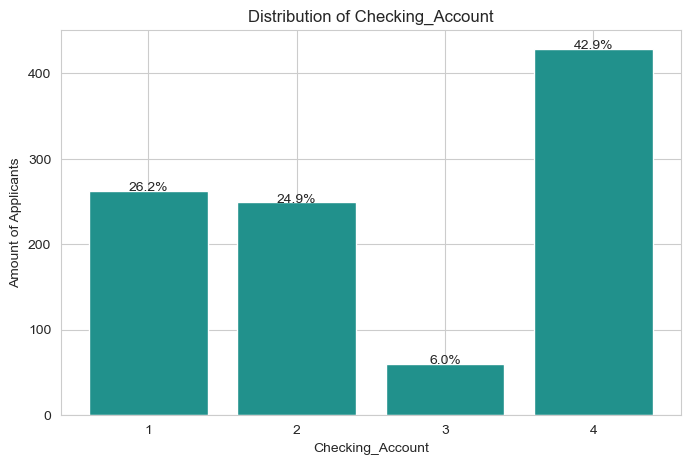

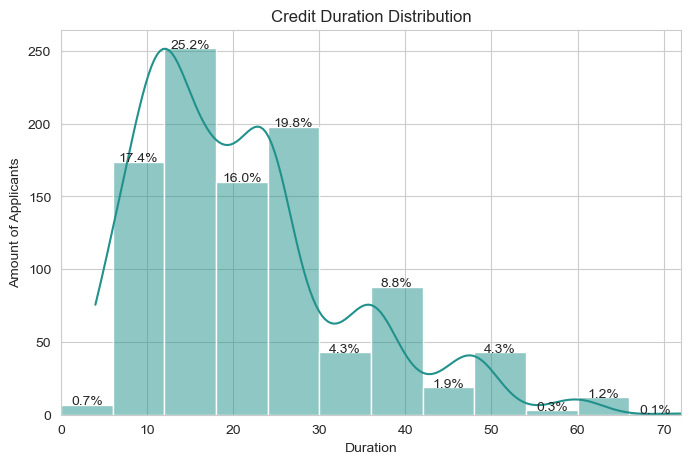

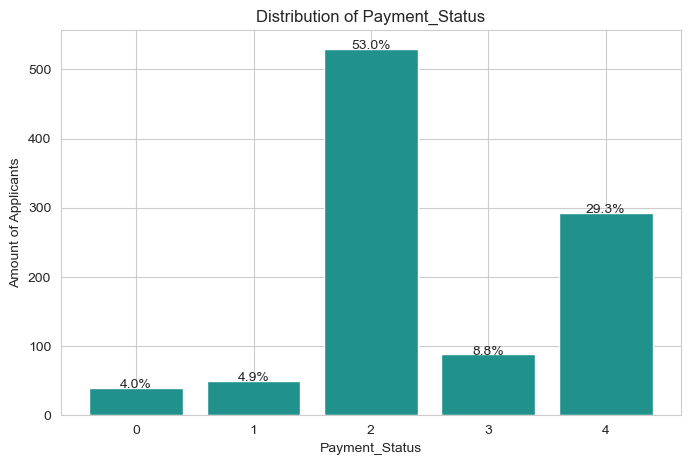

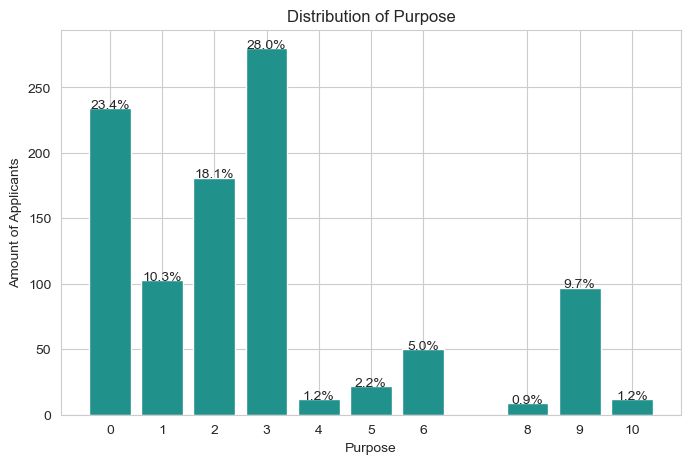

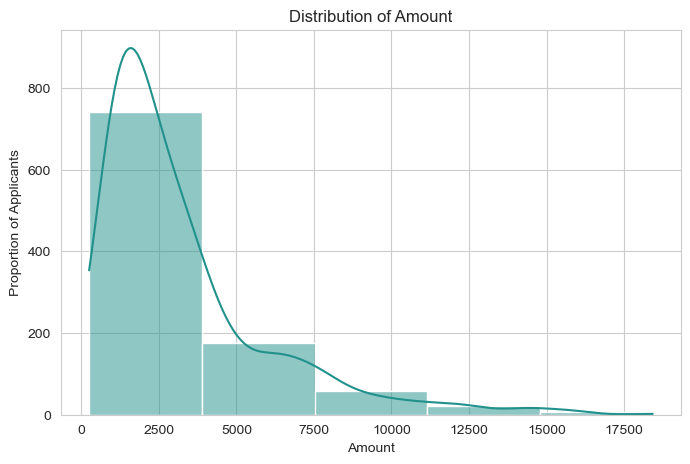

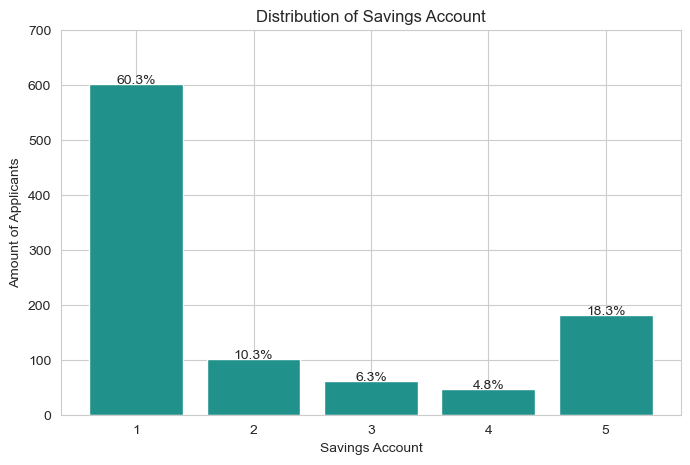

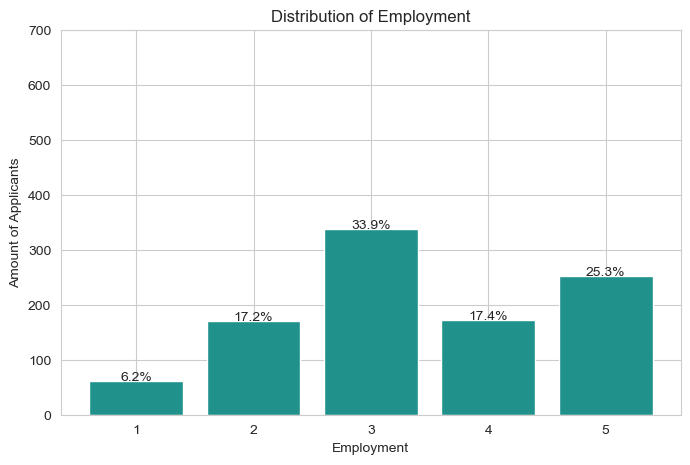

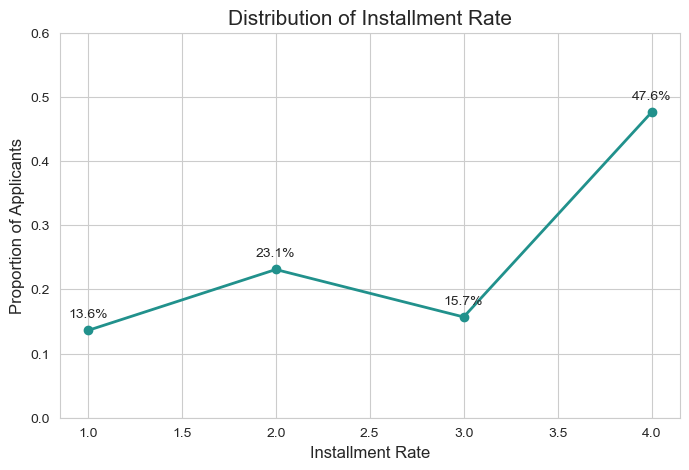

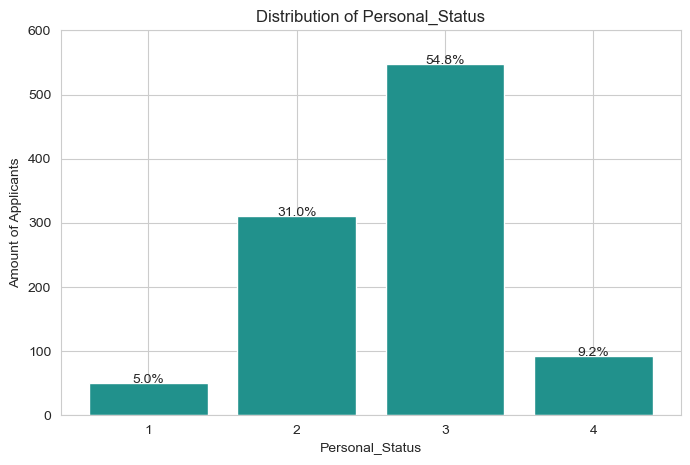

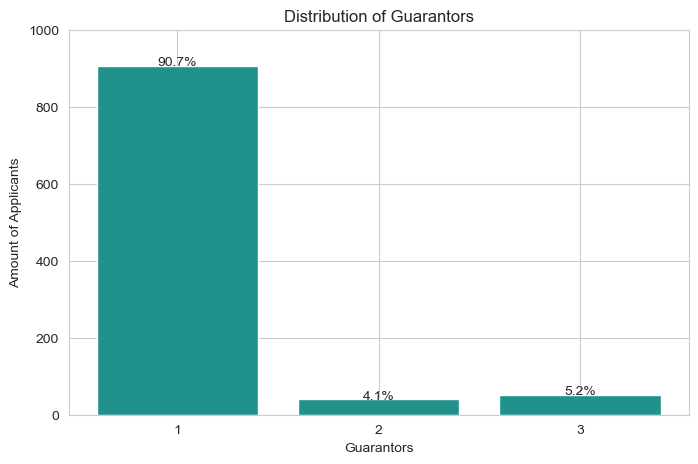

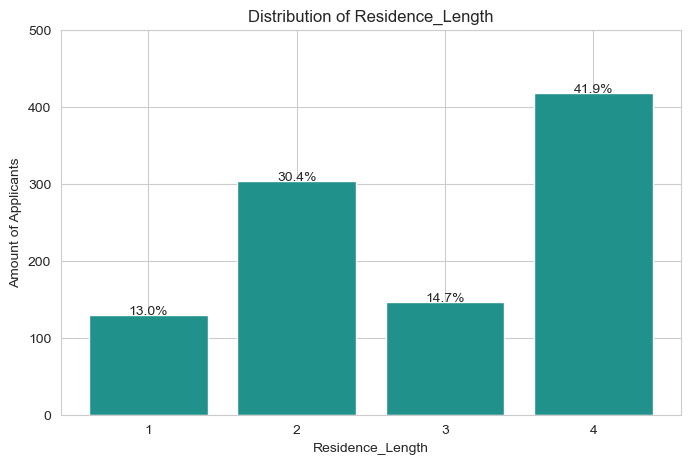

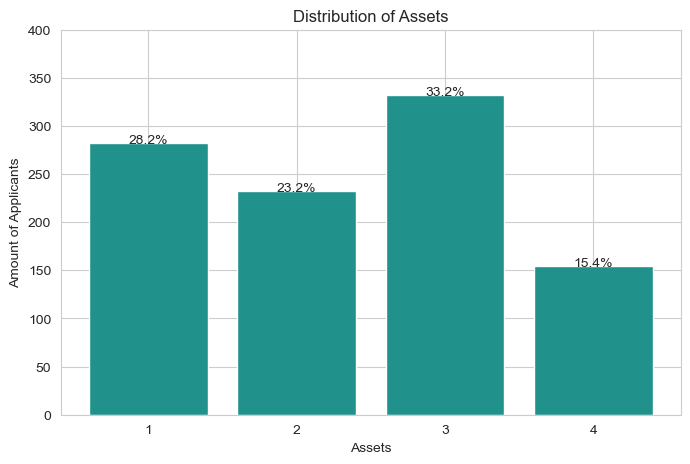

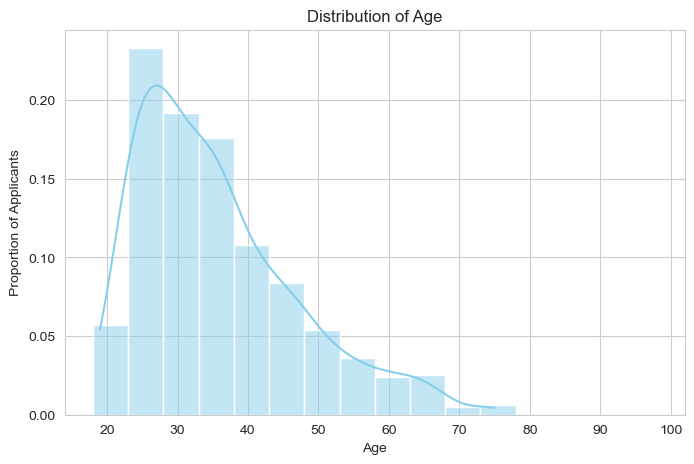

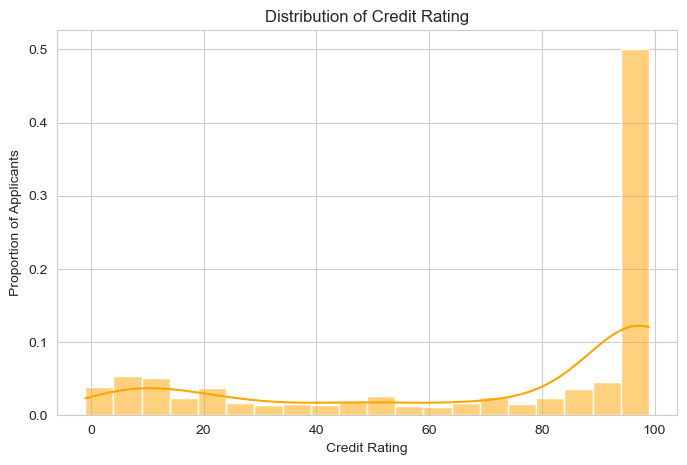

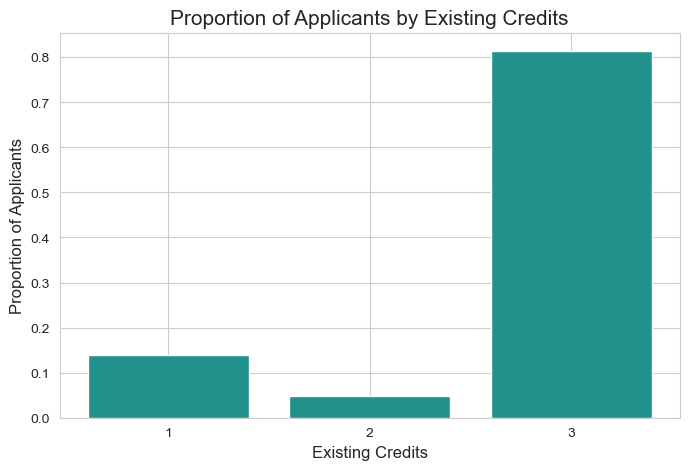

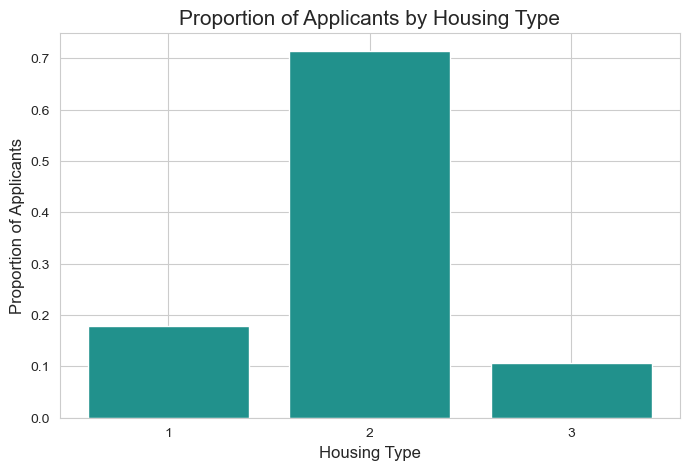

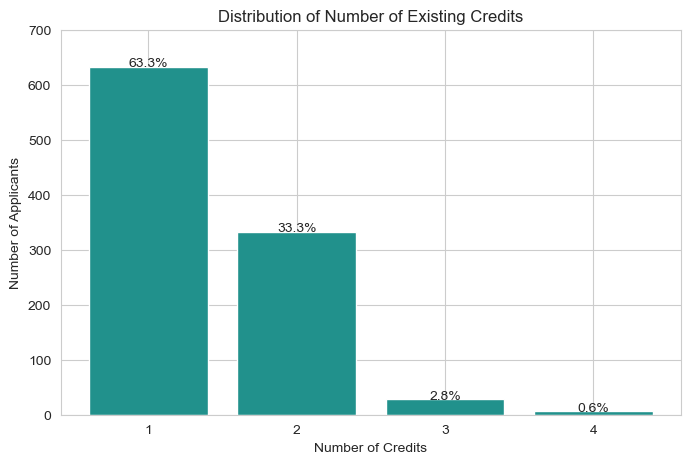

The number of applicants with 1 existing credit is significantly higher than those with 2, 3, or 4 dependents, with applicants having 4 existing credits representing a minority.


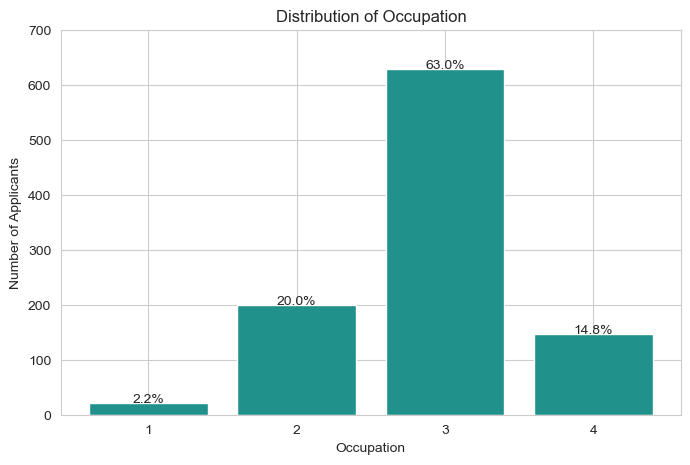

The majority of applicants are skilled employees/officials, while unskilled residents and management/self-employed make up smaller groups, with unemployed/unskilled non-residents being the smallest.


C:\Users\jared\AppData\Local\Temp\ipykernel_2412\475357471.py:359: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit["Dependents"].fillna(0, inplace=True)


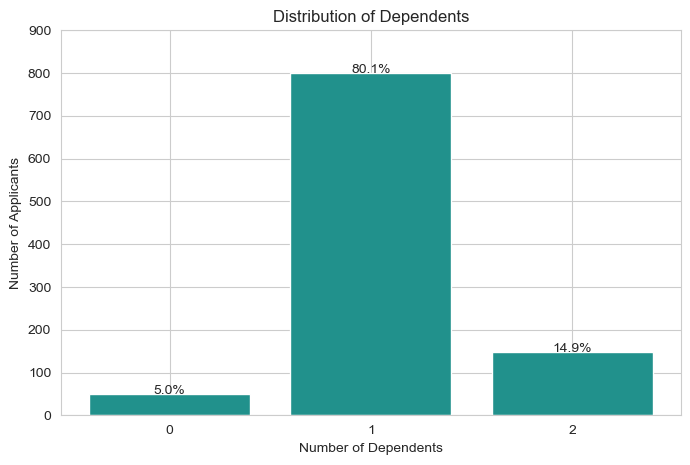

The majority of applicants (80.1%) have 1 dependent, while 14.9% have 2 dependents, and only 5.0% have no dependents.


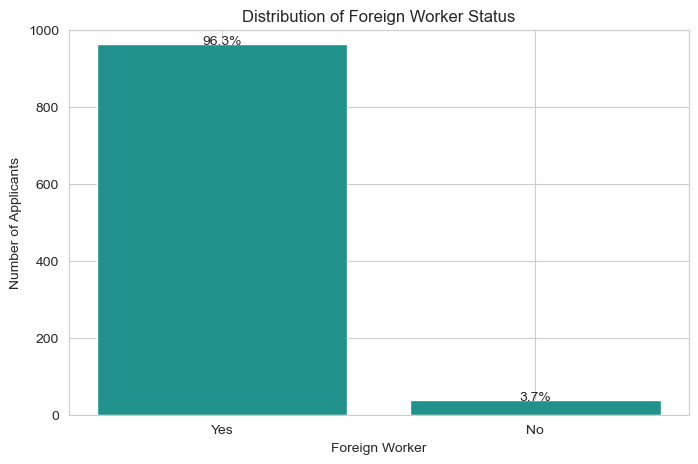

Most of the applicants who apply for credit are foreign workers.


In [26]:
#Checking Account Type Distribution
data = credit.groupby("Checking_Account").size()
plt.figure(figsize=(8, 5))
xs = data.index
ys = data
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Checking_Account")
plt.xlabel("Checking_Account")
plt.ylabel("Proportion of Applicants")
plt.xticks(xs)
for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{height/1000:.1%}', ha="center", fontsize=10)
plt.show()


#Duration Distribution
plt.figure(figsize=(8,5))
ax = sns.histplot(credit["Duration"], bins=[x for x in range(0, 75, 6)], kde=True, color=plt.cm.viridis(0.5))
title = "Distribution of Duration" 
plt.title("Credit Duration Distribution")
plt.xlabel("Duration")
plt.ylabel("Proportion of Applicants")
plt.margins(x=0)
for p in ax.patches:
    height = p.get_height()
    percentage = (height / 1000) * 100  # Calculate percentage
    # Add the text label at the top of each bar
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
    f'{percentage:.1f}%', ha="center", fontsize=10)
plt.show()


#Payment Status Distribution
data = credit.groupby("Payment_Status").size()
plt.figure(figsize=(8, 5))
xs = data.index
ys = data
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Payment_Status")
plt.xlabel("Payment_Status")
plt.ylabel("Amount of Applicants")
plt.xticks(xs)
for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{height/1000:.1%}', ha="center", fontsize=10)
plt.show()

#Credit Purpose Distribution
data = credit.groupby("Purpose").size()
plt.figure(figsize=(8, 5))
xs = data.index
ys = data
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Purpose")
plt.xlabel("Purpose")
plt.ylabel("Amount of Applicants")
plt.xticks(xs)
for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{height/1000:.1%}', ha="center", fontsize=10)
plt.show()



#############BRAD##################
# plot for amount
# Set a consistent style
sns.set_style("whitegrid")


# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(credit["Amount"], bins=5, kde=True, color=plt.cm.viridis(0.5))
plt.title("Distribution of Amount")
plt.xlabel("Amount")
plt.ylabel("Proportion of Applicants")
plt.show()


#Savings Account Type Distribution
data = credit.groupby("Savings_Account").size()
plt.figure(figsize=(8, 5))
xs = data.index
ys = data
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Savings Account")
plt.xlabel("Savings Account")
plt.ylabel("Amount of Applicants")
plt.xticks(xs)
plt.ylim(0,700)
for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{height/1000:.1%}', ha="center", fontsize=10)
plt.show()

#Savings Account Type Distribution
data = credit.groupby("Employment").size()
plt.figure(figsize=(8, 5))
xs = data.index
ys = data
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Employment")
plt.xlabel("Employment")
plt.ylabel("Amount of Applicants")
plt.xticks(xs)
plt.ylim(0,700)
for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{height/1000:.1%}', ha="center", fontsize=10)
plt.show()




# plot for installment rate
# Normalize the values by dividing by the total count
data = credit.groupby("Installment").size()
ys = data / data.sum()


# x-values are the Installment rates
xs = data.index


plt.figure(figsize=(8, 5))


# Plot the line graph (use 'o' marker to indicate points)
ax = plt.plot(xs, ys, marker='o', color=plt.cm.viridis(0.5), linestyle='-', linewidth=2)


# Add title and labels
plt.title("Distribution of Installment Rate", fontsize=15)
plt.xlabel("Installment Rate", fontsize=12)
plt.ylabel("Proportion of Applicants", fontsize=12)


# Adding percentages on top of each point in the line graph
for i, v in enumerate(ys):
    plt.text(xs[i], v + 0.02, f'{v:.1%}', ha='center', fontsize=10)  # Adjust vertical position with + 0.02


# Set y-axis limit (optional, depending on your data)
plt.ylim(0, 0.6)


# Show the plot
plt.show()

##############JARED######################
data = credit.groupby("Personal_Status").size()
plt.figure(figsize=(8, 5))
xs = data.index
ys = data
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Personal_Status")
plt.xlabel("Personal_Status")
plt.ylabel("Amount of Applicants")
plt.xticks(xs)
plt.ylim(0,600)


for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{height/1000:.1%}', ha="center", fontsize=10)
plt.show()


data = credit.groupby("Guarantors").size()
plt.figure(figsize=(8, 5))
xs = data.index
ys = data
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Guarantors")
plt.xlabel("Guarantors")
plt.ylabel("Amount of Applicants")
plt.xticks(xs)
plt.ylim(0,1000)


for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{height/1000:.1%}', ha="center", fontsize=10)
plt.show()




data = credit.groupby("Residence_Length").size()
plt.figure(figsize=(8, 5))
xs = data.index
ys = data
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Residence_Length")
plt.xlabel("Residence_Length")
plt.ylabel("Amount of Applicants")
plt.xticks(xs)
plt.ylim(0,500)


for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{height/1000:.1%}', ha="center", fontsize=10)
plt.show()


data = credit.groupby("Assets").size()
plt.figure(figsize=(8, 5))
xs = data.index
ys = data
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Assets")
plt.xlabel("Assets")
plt.ylabel("Amount of Applicants")
plt.xticks(xs)
plt.ylim(0,400)


for p in ax:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,  # Adjust vertical positioning with + 0.02
             f'{height/1000:.1%}', ha="center", fontsize=10)
plt.show()

sns.set_style("whitegrid")
#####################################################################Denzyl##################################################################################################################
# Histogram for Age (Proportion)
plt.figure(figsize=(8, 5))
sns.histplot(credit["Age"], bins=[x for x in range(18, 100, 5)], kde=True, color="skyblue", stat="probability")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Proportion of Applicants")
plt.show()
# Histogram for Credit Rating (Proportion)
plt.figure(figsize=(8, 5))
sns.histplot(credit["Credit_Rating"], bins=20, kde=True, color="orange", stat="probability")
plt.title("Distribution of Credit Rating")
plt.xlabel("Credit Rating")
plt.ylabel("Proportion of Applicants")
plt.show()






# plot for Existing Credits (normalized)
credit["Existing_Credits"] = credit["Existing_Credits"].astype(int)
data = credit.groupby("Existing_Credits").size()


# Normalize the values by dividing by the total count
ys = data / data.sum()
xs = data.index
plt.figure(figsize=(8, 5))


# Set all bars to a specific color from the 'viridis' colormap
plt.bar(xs, ys, color=plt.cm.viridis(0.5))  # 0.5 for a middle color from the colormap
plt.title("Proportion of Applicants by Existing Credits", fontsize=15)
plt.xlabel("Existing Credits", fontsize=12)
plt.ylabel("Proportion of Applicants", fontsize=12)
plt.xticks(range(1, 4))
plt.show()




# Countplot for Housing Type (Proportion)
credit["Housing_Type"] = credit["Housing_Type"].astype(int)
data = credit.groupby("Housing_Type").size()


# Normalize the values by dividing by the total count
ys = data / data.sum()
xs = data.index
plt.figure(figsize=(8, 5))


# Set all bars to a specific color from the 'viridis' colormap
plt.bar(xs, ys, color=plt.cm.viridis(0.5))  # 0.5 for a middle color from the colormap


plt.title("Proportion of Applicants by Housing Type", fontsize=15)
plt.xlabel("Housing Type", fontsize=12)
plt.ylabel("Proportion of Applicants", fontsize=12)
plt.xticks(range(1, 4))
plt.show()

############PRIYA##############
# Countplot for Number of Existing Credits
credit_counts = credit["Num_Credits"].value_counts().sort_index()
plt.figure(figsize=(8, 5))
xs = credit_counts.index
ys = credit_counts  # Keep raw counts, not proportions
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Number of Existing Credits")
plt.xlabel("Number of Credits")
plt.ylabel("Number of Applicants")
plt.xticks(xs)
plt.ylim(0, 700)  # Set y-limit to 1000


# Add percentages on top of the bars
total_count = credit_counts.sum()
for p in ax:
    height = p.get_height()
    percentage = (height / total_count) * 100
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,
             f'{percentage:.1f}%', ha="center", fontsize=10)


plt.show()
print("The number of applicants with 1 existing credit is significantly higher than those with 2, 3, or 4 dependents, with applicants having 4 existing credits representing a minority.")


# Filter out invalid values for Occupation (keep only 1, 2, 3, 4)
credit = credit[credit["Occupation"].isin([1, 2, 3, 4])]


# Countplot for Occupation (without mapping)
occupation_counts = credit["Occupation"].value_counts()
plt.figure(figsize=(8, 5))
xs = occupation_counts.index
ys = occupation_counts  # Keep raw counts, not proportions
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Occupation")
plt.xlabel("Occupation")
plt.ylabel("Number of Applicants")
plt.xticks(xs)  # Set x-ticks to the actual occupation values (1, 2, 3, 4)
plt.ylim(0, 700)  # Set y-limit to 700


# Add percentages on top of the bars
total_count = occupation_counts.sum()
for p in ax:
    height = p.get_height()
    percentage = (height / total_count) * 100
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,
             f'{percentage:.1f}%', ha="center", fontsize=10)


plt.show()
print("The majority of applicants are skilled employees/officials, while unskilled residents and management/self-employed make up smaller groups, with unemployed/unskilled non-residents being the smallest.")




# Replace NaN values with 0 in Dependents
credit["Dependents"].fillna(0, inplace=True)


# Convert Dependents to integer type
credit["Dependents"] = credit["Dependents"].astype(int)


# Filter data to keep only valid Dependents values (0, 1, 2)
credit = credit[credit["Dependents"].isin([0, 1, 2])]


# Countplot for Number of Dependents
dependents_counts = credit["Dependents"].value_counts().sort_index()
plt.figure(figsize=(8, 5))
xs = dependents_counts.index
ys = dependents_counts  # Keep raw counts, not proportions
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Dependents")
plt.xlabel("Number of Dependents")
plt.ylabel("Number of Applicants")
plt.ylim(0, 900)  # Set y-limit to 900


# Add percentages on top of the bars
total_count = dependents_counts.sum()
for p in ax:
    height = p.get_height()
    percentage = (height / total_count) * 100
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,
             f'{percentage:.1f}%', ha="center", fontsize=10)


# Set x-ticks explicitly to integers
plt.xticks([0, 1, 2])


plt.show()
print("The majority of applicants (80.1%) have 1 dependent, while 14.9% have 2 dependents, and only 5.0% have no dependents.")




# Filter out invalid values for Foreign_Worker (keep only 1 and 2)
credit = credit[credit["Foreign_Worker"].isin([1, 2])]


# Correctly map Foreign_Worker values
foreign_worker_mapping = {1: "Yes", 2: "No"}
credit["Foreign_Worker"] = credit["Foreign_Worker"].map(foreign_worker_mapping)


# Countplot for Foreign Worker Status
foreign_worker_counts = credit["Foreign_Worker"].value_counts()
plt.figure(figsize=(8, 5))
xs = foreign_worker_counts.index
ys = foreign_worker_counts  # Keep raw counts, not proportions
ax = plt.bar(xs, ys, color=plt.cm.viridis(0.5))
plt.title("Distribution of Foreign Worker Status")
plt.xlabel("Foreign Worker")
plt.ylabel("Number of Applicants")
plt.ylim(0, 1000)  


# Add percentages on top of the bars
total_count = foreign_worker_counts.sum()
for p in ax:
    height = p.get_height()
    percentage = (height / total_count) * 100
    plt.text(p.get_x() + p.get_width() / 2., height + 0.02,
             f'{percentage:.1f}%', ha="center", fontsize=10)


plt.show()
print("Most of the applicants who apply for credit are foreign workers.")

Key Observations Made:
Checking Account

Duration

Payment Status

Purpose

Amount

Savings Account

Employment

Installment

Personal Status

Guarantors

Residence Length

Assets

Age

Credit Rating

Existing Credits

Housing Type

Num Credits

Occupation

Dependents

Telephone

Foreign Worker


**c.** Perform bi-variate analysis on the variables. You do not need to present the analysis of every pair of variables; only focus on the pairs you believe are worth investigating and explain. For each pair, describe the relationship between the two variables. Use appropriate statistical methods and/or visualizations.

**Response.** 

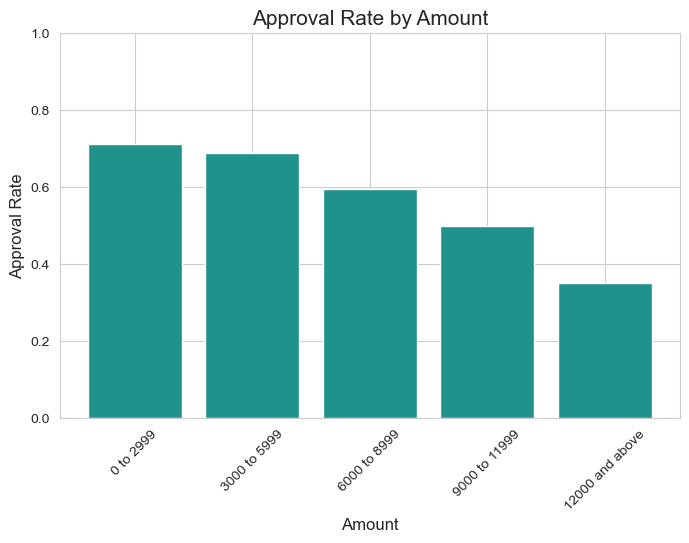

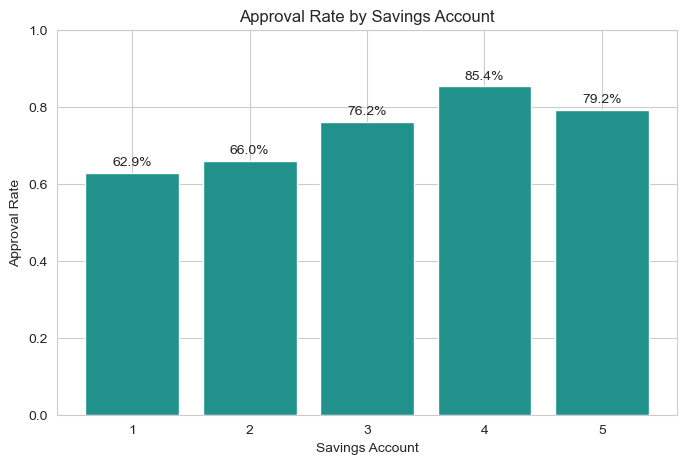

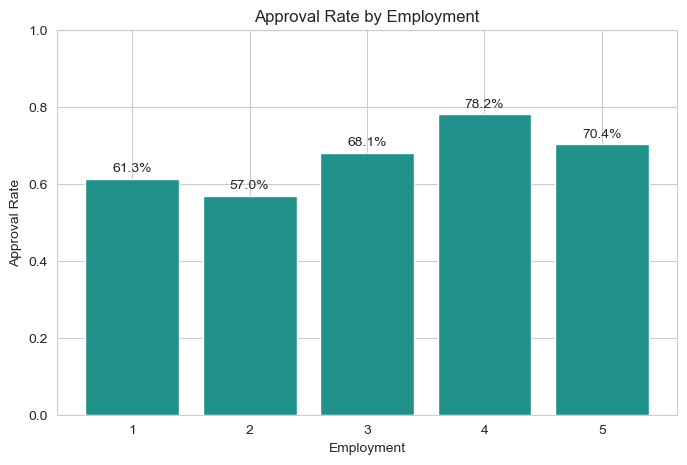

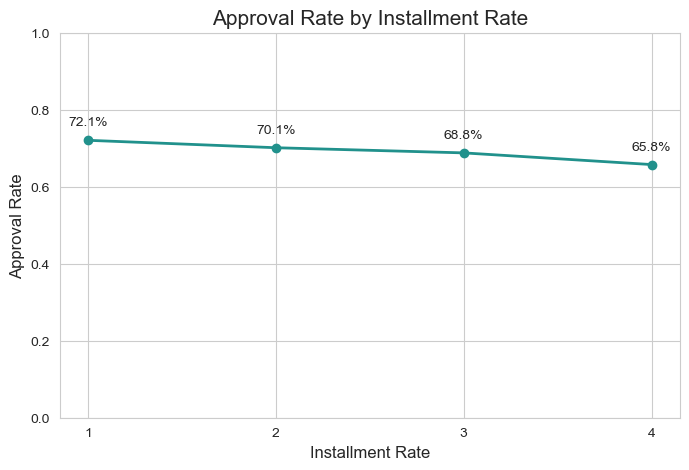

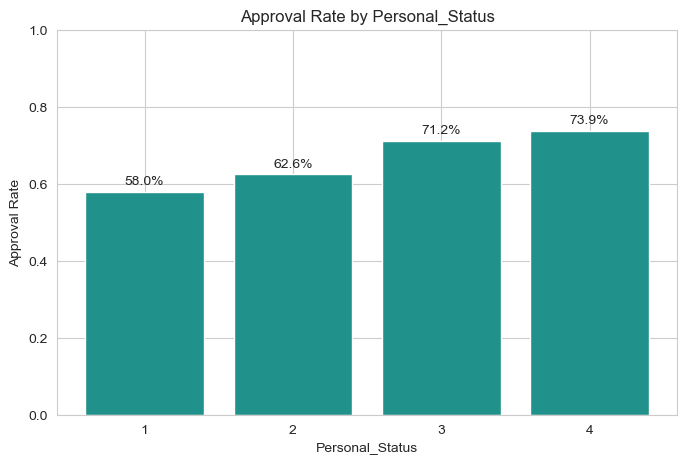

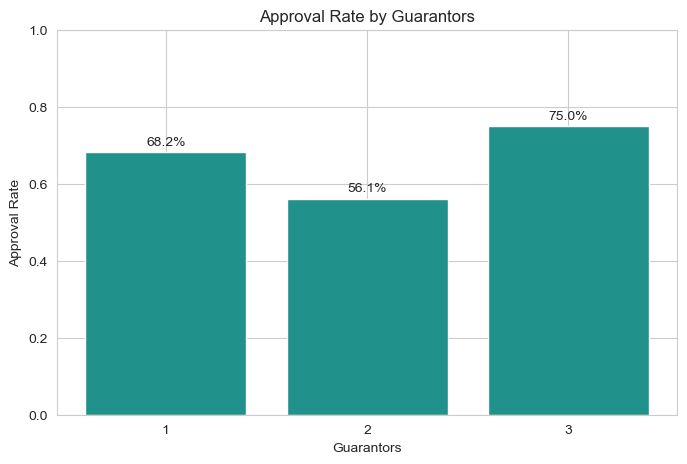

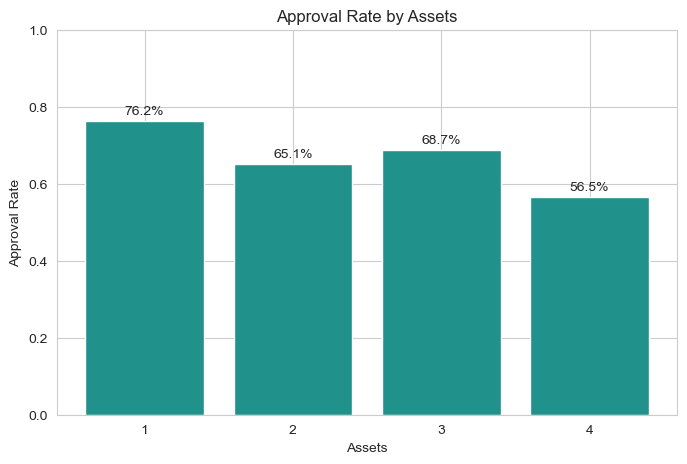

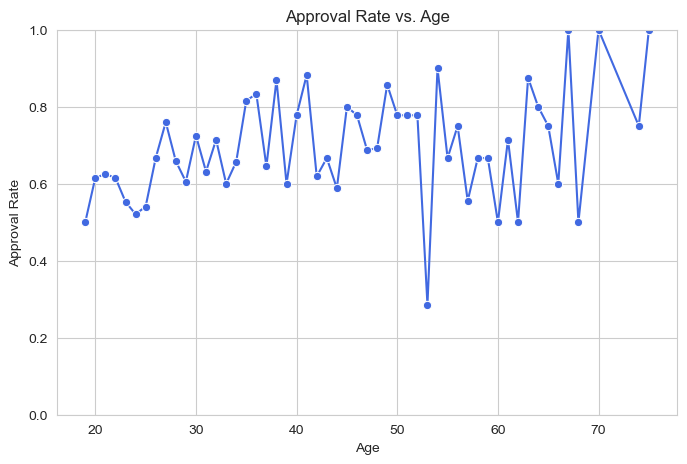

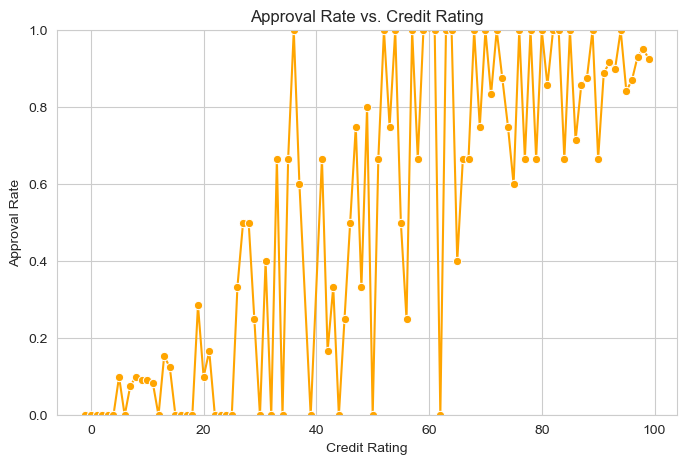

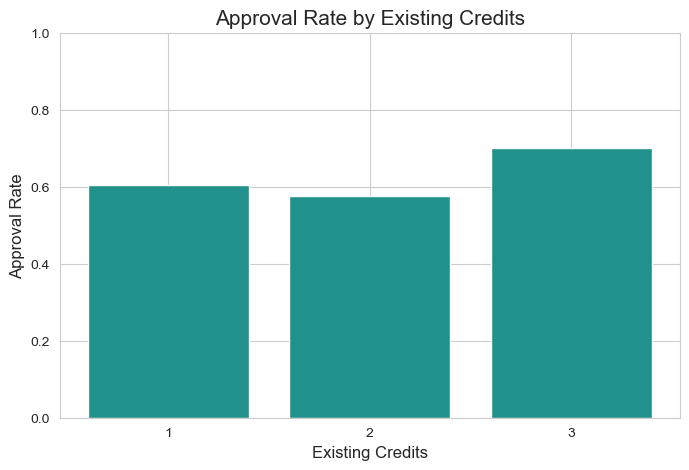

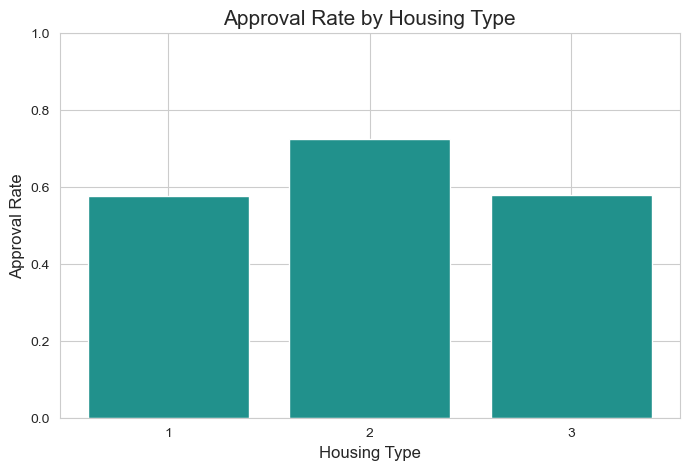

Housing Type - Mode: 2


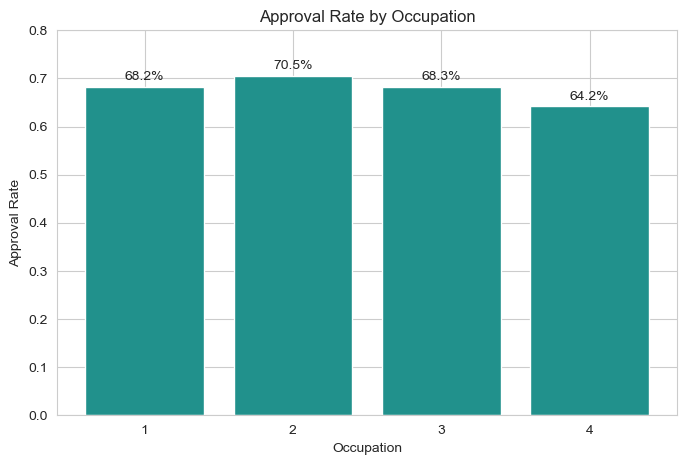

Being a resident is associated with a higher approval rate than non-resident. Additionally, approval rates tend to increase for unskilled applicants if they are residents, likely because credit is approved for retraining purposes.


C:\Users\jared\AppData\Local\Temp\ipykernel_2412\3360451474.py:365: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  credit["Dependents"].fillna(0, inplace=True)


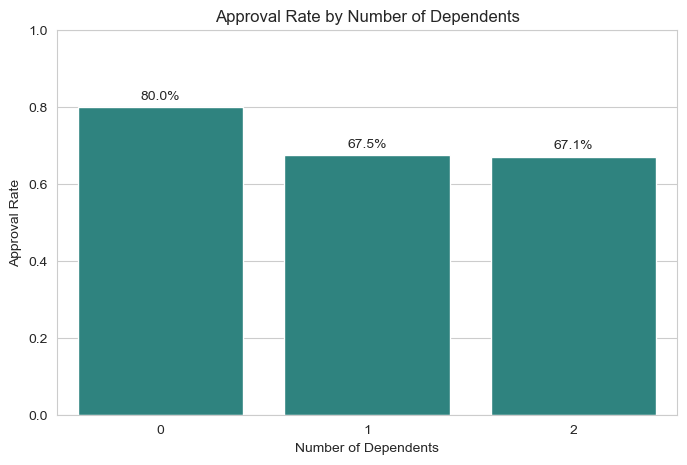

Although it appears that the approval rate decreases as the number of dependents increases, we cannot confidently draw this conclusion. This is because applicants with 0 dependents were inferred due to missing values, and they make up only 5% of the dataset, which may not be representative.


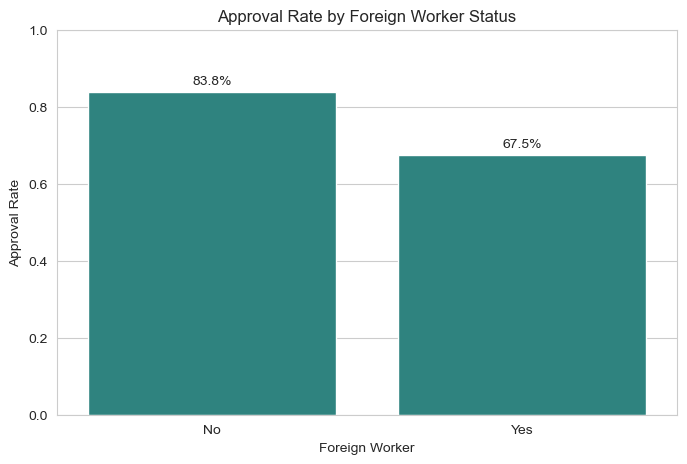

Being a foreign worker is associated with lower approval rate.


In [9]:
#################BRAD#############################
# bivariate analysis of amount and approval

bins = [0, 3000, 6000, 9000, 12000, np.inf]  

credit['Amount_Binned'] = pd.cut(credit['Amount'], bins=bins, right=False)
bin_labels = ['0 to 2999', '3000 to 5999', '6000 to 8999', '9000 to 11999', '12000 and above']
credit['Amount_Binned'] = credit['Amount_Binned'].cat.rename_categories(bin_labels)
approval_rate_by_bin = credit.groupby('Amount_Binned', observed=False)['Approval'].mean().reset_index()
plt.figure(figsize=(8, 5))

x = approval_rate_by_bin['Amount_Binned']
y = approval_rate_by_bin['Approval']

plt.bar(x, y, color=plt.cm.viridis(0.5))
plt.title("Approval Rate by Amount", fontsize=15)
plt.xlabel("Amount", fontsize=12)
plt.ylabel("Approval Rate", fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Ensure the y-axis is between 0 and 1 for approval rate

plt.show()




# bivariate analysis of savings account and approval
credit["Savings_Account"] = credit["Savings_Account"].astype(str)

data = credit.groupby("Savings_Account")["Approval"].mean()

xs = data.index
ys = data

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(xs, ys, color=plt.cm.viridis(0.5))

ax.set_title("Approval Rate by Savings Account")
ax.set_xlabel("Savings Account")
ax.set_ylabel("Approval Rate")

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1%}', 
                (bar.get_x() + bar.get_width() / 2., height), 
                textcoords="offset points", 
                xytext=(0, 5),
                ha="center")

ax.set_ylim(0, 1)

plt.show()




#bivariate analysis of employment and approval
credit["Employment"] = credit["Employment"].astype(str)

data = credit.groupby("Employment")["Approval"].mean()

xs = data.index
ys = data

fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(xs, ys, color=plt.cm.viridis(0.5))

ax.set_title("Approval Rate by Employment")
ax.set_xlabel("Employment")
ax.set_ylabel("Approval Rate")

for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1%}', 
                (bar.get_x() + bar.get_width() / 2., height), 
                textcoords="offset points", 
                xytext=(0, 5),
                ha="center")

ax.set_ylim(0, 1)

plt.show()


#bivariate analysis of installment and approval
credit["Installment"] = credit["Installment"].astype(str)

data = credit.groupby("Installment")["Approval"].mean()

xs = data.index
ys = data

plt.figure(figsize=(8, 5))
plt.plot(xs, ys, marker='o', color=plt.cm.viridis(0.5), linewidth=2)


for i, (x, y) in enumerate(zip(xs, ys)):
    plt.text(x, y + 0.03, f'{y:.1%}', ha='center', va='bottom', fontsize=10)  # y + 0.03 to move text higher

plt.title("Approval Rate by Installment Rate", fontsize=15)
plt.xlabel("Installment Rate", fontsize=12)
plt.ylabel("Approval Rate", fontsize=12)

plt.ylim(0, 1)

plt.show()



######################JARED#####################################
credit["Personal_Status"] = credit["Personal_Status"].astype(str)


# Calculate the approval rate for each Personal_Status category
data = credit.groupby("Personal_Status")["Approval"].mean()


xs = data.index
ys = data


# Create the bar plot and store the bars in 'ax'
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(xs, ys, color=plt.cm.viridis(0.5))


# Title and labels
ax.set_title("Approval Rate by Personal_Status")
ax.set_xlabel("Personal_Status")
ax.set_ylabel("Approval Rate")


# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1%}', 
                (bar.get_x() + bar.get_width() / 2., height), 
                textcoords="offset points", 
                xytext=(0, 5),  # Slight offset above the bar
                ha="center")


# Set the y-axis limits to range from 0 to 1
ax.set_ylim(0, 1)


# Show the plot
plt.show()




credit["Guarantors"] = credit["Guarantors"].astype(str)


# Calculate the approval rate for each Guarantors category
data = credit.groupby("Guarantors")["Approval"].mean()


xs = data.index
ys = data


# Create the bar plot and store the bars in 'ax'
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(xs, ys, color=plt.cm.viridis(0.5))


# Title and labels
ax.set_title("Approval Rate by Guarantors")
ax.set_xlabel("Guarantors")
ax.set_ylabel("Approval Rate")


# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1%}', 
                (bar.get_x() + bar.get_width() / 2., height), 
                textcoords="offset points", 
                xytext=(0, 5),  # Slight offset above the bar
                ha="center")


# Set the y-axis limits to range from 0 to 1
ax.set_ylim(0, 1)


# Show the plot
plt.show()

credit["Assets"] = credit["Assets"].astype(str)


# Calculate the approval rate for each Assets category
data = credit.groupby("Assets")["Approval"].mean()


xs = data.index
ys = data


# Create the bar plot and store the bars in 'ax'
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(xs, ys, color=plt.cm.viridis(0.5))


# Title and labels
ax.set_title("Approval Rate by Assets")
ax.set_xlabel("Assets")
ax.set_ylabel("Approval Rate")


# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1%}', 
                (bar.get_x() + bar.get_width() / 2., height), 
                textcoords="offset points", 
                xytext=(0, 5),  # Slight offset above the bar
                ha="center")


# Set the y-axis limits to range from 0 to 1
ax.set_ylim(0, 1)


# Show the plot
plt.show()

###############DENZYL######################
# Approval Rate vs. Age
approval_rate_by_age = credit.groupby("Age")["Approval"].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=approval_rate_by_age.index, y=approval_rate_by_age.values, marker="o", color="royalblue")
plt.title("Approval Rate vs. Age")
plt.xlabel("Age")
plt.ylabel("Approval Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


# Approval Rate vs. Credit Rating
approval_rate_by_credit = credit.groupby("Credit_Rating")["Approval"].mean()
plt.figure(figsize=(8, 5))
sns.lineplot(x=approval_rate_by_credit.index, y=approval_rate_by_credit.values, marker="o", color="orange")
plt.title("Approval Rate vs. Credit Rating")
plt.xlabel("Credit Rating")
plt.ylabel("Approval Rate")
plt.ylim(0, 1)
plt.grid(True)
plt.show()


# Approval Rate for Existing Credits
credit["Existing_Credits"] = credit["Existing_Credits"].astype(int)


# Compute approval rate instead of count
data = credit.groupby("Existing_Credits")["Approval"].mean()


# Get x (categories) and y (approval rate)
ys = data  # Already normalized as mean (between 0 and 1)
xs = data.index


plt.figure(figsize=(8, 5))


# Set all bars to a specific color from the 'viridis' colormap
plt.bar(xs, ys, color=plt.cm.viridis(0.5))  # 0.5 for a middle color from the colormap


plt.title("Approval Rate by Existing Credits", fontsize=15)
plt.xlabel("Existing Credits", fontsize=12)
plt.ylabel("Approval Rate", fontsize=12)
plt.ylim(0, 1)  # Approval rate is always between 0 and 1
plt.xticks(range(1, 4))  # Adjust based on unique categories
plt.show()



# Approval Rate for Housing Type
credit["Housing_Type"] = credit["Housing_Type"].astype(int)


# Compute approval rate instead of count
data = credit.groupby("Housing_Type")["Approval"].mean()


# Get x (categories) and y (approval rate)
ys = data  # Already normalized as mean (between 0 and 1)
xs = data.index


plt.figure(figsize=(8, 5))


# Set all bars to a specific color from the 'viridis' colormap
plt.bar(xs, ys, color=plt.cm.viridis(0.5))  # 0.5 for a middle color from the colormap


plt.title("Approval Rate by Housing Type", fontsize=15)
plt.xlabel("Housing Type", fontsize=12)
plt.ylabel("Approval Rate", fontsize=12)
plt.ylim(0, 1)  # Approval rate is always between 0 and 1
plt.xticks(range(1, 4))  # Adjust based on unique categories
plt.show()


# Display statistics
print(f"Housing Type - Mode: {credit['Housing_Type'].mode()[0]}")

#################PRIYA#####################
# Bivariate analysis for Occupation and Approval
credit["Occupation"] = credit["Occupation"].astype(str)


# Calculate the approval rate for each savings account category
data = credit.groupby("Occupation")["Approval"].mean()


xs = data.index
ys = data


# Create the bar plot and store the bars in 'ax'
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(xs, ys, color=plt.cm.viridis(0.5))


# Title and labels
ax.set_title("Approval Rate by Occupation")
ax.set_xlabel("Occupation")
ax.set_ylabel("Approval Rate")


# Add text annotations to each bar
for bar in bars:
    height = bar.get_height()
    ax.annotate(f'{height:.1%}',
                (bar.get_x() + bar.get_width() / 2., height),
                textcoords="offset points",
                xytext=(0, 5),  # Slight offset above the bar
                ha="center")


# Set the y-axis limits to range from 0 to 1
ax.set_ylim(0, 0.8)


# Show the plot
plt.show()
print("Being a resident is associated with a higher approval rate than non-resident. Additionally, approval rates tend to increase for unskilled applicants if they are residents, likely because credit is approved for retraining purposes.")






# Bivariate analysis for Dependents and Approval
# Replace NaN values with 0 in Dependents
credit["Dependents"].fillna(0, inplace=True)


# Convert Dependents to integer type
#credit["Dependents"] = credit["Dependents"].astype(int)


credit["Dependents"] = credit["Dependents"].astype(str)
data = credit.groupby("Dependents")["Approval"].mean()


plt.figure(figsize=(8, 5))
ax = sns.barplot(x=data.index, y=data.values, color=plt.cm.viridis(0.5))
plt.title("Approval Rate by Number of Dependents")
plt.xlabel("Number of Dependents")
plt.ylabel("Approval Rate")
plt.ylim(0, 1)


# Add percentages on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.1%}', ha="center")


plt.show()
print("Although it appears that the approval rate decreases as the number of dependents increases, we cannot confidently draw this conclusion. This is because applicants with 0 dependents were inferred due to missing values, and they make up only 5% of the dataset, which may not be representative.")


# Bivariate analysis for Foreign Worker and Approval
data = credit.groupby("Foreign_Worker")["Approval"].mean()


plt.figure(figsize=(8, 5))
ax = sns.barplot(x=data.index, y=data.values, color=plt.cm.viridis(0.5))
plt.title("Approval Rate by Foreign Worker Status")
plt.xlabel("Foreign Worker")
plt.ylabel("Approval Rate")
plt.ylim(0, 1)


# Add percentages on top of the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.02, f'{height:.1%}', ha="center")


plt.show()
print("Being a foreign worker is associated with lower approval rate.")


Describe the relationship between the two variables,

